In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

## データのダウンロード

https://linus-mk.hatenablog.com/entry/2019/03/24/002135

In [2]:
pima = sm.datasets.get_rdataset("Pima.tr", "MASS")
print(type(pima))

<class 'statsmodels.datasets.utils.Dataset'>


In [3]:
pima.data

,npreg,glu,bp,skin,bmi,ped,age,type
0,5,86,68,28,30.2,0.364,24,No
1,7,195,70,33,25.1,0.163,55,Yes
2,5,77,82,41,35.8,0.156,35,No
3,0,165,76,43,47.9,0.259,26,No
4,0,107,60,25,26.4,0.133,23,No
...,...,...,...,...,...,...,...,...
195,2,141,58,34,25.4,0.699,24,No
196,7,129,68,49,38.5,0.439,43,Yes
197,0,106,70,37,39.4,0.605,22,No
198,1,118,58,36,33.3,0.261,23,No


In [4]:
df = pima.data.loc[:, ['glu', 'bmi', 'type']]

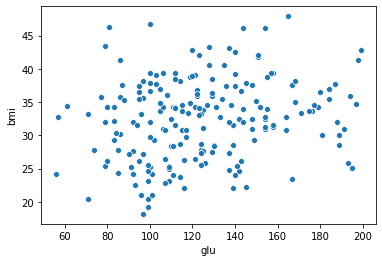

In [5]:
sns.scatterplot(x='glu', y='bmi', data=df)

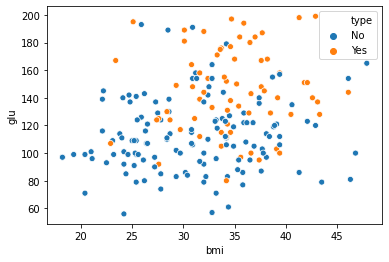

In [6]:
sns.scatterplot(x='bmi', y='glu', hue='type', data=df)

# あー、typeがアルファベット順になってるのか……categoricalにしたほうがきれいかもしれない

In [7]:
# 「初めてのパターン認識」に従い、データの標準化
# pandasだけだとあまりきれいに書けないので、standardscaler経由で変換する
# https://note.nkmk.me/python-list-ndarray-dataframe-normalize-standardize/

sc = StandardScaler()

df_scaled = df.copy()
df_scaled.loc[:, ['glu', 'bmi']] = sc.fit_transform(df_scaled.loc[:, ['glu', 'bmi']])

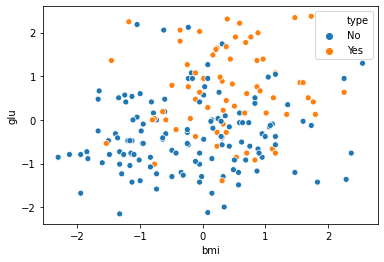

In [8]:
sns.scatterplot(x='bmi', y='glu', hue='type', data=df_scaled)

## RBFカーネルによるサポートベクターマシンで学習